In [1]:
import pandas as pd
import numpy as np
import os
from astropy.io import fits

sdss_general_path = "C:/Users/lrik/Work"
sdss_filename_fits = "specObj-dr17.fits"
sdss_path = f"{sdss_general_path}/{sdss_filename_fits}"

spec_path = "C:/Users/lrik/Work/spectra"

In [4]:
from astropy.io import fits
fits_file = fits.open(sdss_path)
hdr = fits_file[1].header
hdr

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                 1162 /Number of bytes per row                         
NAXIS2  =              5801200 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                  133 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [5]:
data = fits_file[1].data

In [24]:
col = ['SURVEY', 'INSTRUMENT', 'CHUNK', 'PROGRAMNAME', 'PLATERUN', 'PLATEQUALITY', 
       'SPECOBJID', 'FLUXOBJID', 'BESTOBJID', 'PLATEID', 'NSPECOBS', 'FIRSTRELEASE', 'RUN2D', 'SOURCETYPE', 'TARGETTYPE',
       'SPECTROGRAPHID', 'PLATE', 'TILE', 'MJD', 'FIBERID',
       'PLUG_RA', 'PLUG_DEC', 'CLASS', 'SUBCLASS','Z', 'Z_ERR', 'RCHI2', 'RCHI2DIFF', 
       'WAVEMIN', 'WAVEMAX', 'WCOVERAGE', 'ZWARNING', 'SN_MEDIAN_ALL',
       'SPEC1_G', 'SPEC1_R', 'SPEC1_I', 'SPEC2_G', 'SPEC2_R', 'SPEC2_I',
       'Z_NOQSO', 'Z_ERR_NOQSO', 'ZWARNING_NOQSO', 'CLASS_NOQSO', 'SUBCLASS_NOQSO', 'RCHI2DIFF_NOQSO', 'Z_PERSON', 'CLASS_PERSON', 'Z_CONF_PERSON']

#np.shape(data[:][col[0]])

with open(f'{sdss_general_path}/SDSS_spec.csv','w') as file:
       file.write(','.join(col) + "\n")
       for i in range(5801200):
              line = ''
              for j, name in enumerate(col):
                     if(j == len(col) - 1):
                            line += str(data[i][name]) + '\n'       
                            break
                     line += str(data[i][name]) + ','
              file.write(line)


In [19]:
line = ''
for j, name in enumerate(col):
    if(j == len(col) - 1):
        line += str(data[0][name]) + '\n'       
    line += str(data[0][name]) + ','
line

'sdss,SDSS,chunk4,legacy,chunk4,bad,    299489676975171584,1237648720142401611,1237648720142401611,299489402097264640,2,dr7,26,GALAXY,SCIENCE,1,266,122,51602,1,146.71421,-1.0413043,GALAXY,,0.021275453,9.121824e-06,1.0740697,3.8736846,3806.2737,9202.377,0.3777,0,38.055374,20.858,16.1727,13.4718,13.3075,10.6615,7.67533,0.0,0.0,0,,,0.0,0.0,0,0\n0,'

<h3>Read file with selected spec id data</h3>

In [6]:
data = pd.read_csv(f"{sdss_general_path}/SDSS_spec.csv", dtype=str, keep_default_na=False)

In [3]:
data

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,SPEC2_I,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON
0,sdss,SDSS,chunk4,legacy,chunk4,bad,299489676975171584,1237648720142401611,1237648720142401611,299489402097264640,...,7.67533,0.0,0.0,0,,,0.0,0.0,0,0
1,sdss,SDSS,chunk4,legacy,chunk4,bad,299489951853078528,1237648720142532891,1237648720142532891,299489402097264640,...,7.67533,0.0,0.0,0,,,0.0,0.0,0,0
2,sdss,SDSS,chunk4,legacy,chunk4,bad,299490226730985472,1237648720142532813,1237648720142532813,299489402097264640,...,7.67533,0.0,0.0,0,,,0.0,0.0,0,0
3,sdss,SDSS,chunk4,legacy,chunk4,bad,299490501608892416,1237650795146576030,1237650795146576030,299489402097264640,...,7.67533,0.0,0.0,0,,,0.0,0.0,0,0
4,sdss,SDSS,chunk4,legacy,chunk4,bad,299490776486799360,1237650795146510903,1237650795146510903,299489402097264640,...,7.67533,0.0,0.0,0,,,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801195,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,14126940059338037248,,,14126666280946642944,...,81.5267,0.35408843,0.00022003648,5,GALAXY,,0.0009493232,0.0,0,0
5801196,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,14126940334215944192,1237673708259377309,1237673708259377309,14126666280946642944,...,81.5267,0.7299294,5.4885277e-05,0,GALAXY,,0.20018506,0.0,0,0
5801197,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,14126940609093851136,1237653665254932827,1237653665254932827,14126666280946642944,...,81.5267,0.07164538,0.00016973334,0,GALAXY,,0.021977425,0.0,0,0
5801198,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,14126940883971758080,1237673708259377597,1237673708259377597,14126666280946642944,...,81.5267,0.34489542,1.7945056e-05,0,GALAXY,,1.4949696,0.0,0,0


In [ ]:
#r2d,plate,fiberid,mjd
data[0][28],data[0][61],data[0][62],data[0][63]

IndexError: index 61 is out of bounds for axis 0 with size 48

In [11]:
p = "C:/Users/lrik/Downloads"
nf = "spec-2215-53793-0296_f.fits"
nl = "spec-2215-53793-0296_l.fits"

In [19]:
f = fits.open(f"{p}/{nl}")
f[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3808 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [62]:
import wget
url_sas = lambda r2d,plate,fiberid,mjd: f"https://dr18.sdss.org/sas/dr18/spectro/sdss/redux/{r2d}/spectra/lite/{plate}/spec-{plate}-{mjd}-{fiberid}.fits"

fix_number = lambda x: ('0000' + str(x))[-4:]

wget.download(url=url_sas(data[0][28],fix_number(data[0][61]),fix_number(data[0][62]),data[0][63]))


'spec-0266-51602-0122.fits'

<h2> Reading spectra </h2>

In [63]:
spec = fits.open('spec-0266-51602-0122.fits')

In [64]:
spec.info()

Filename: spec-0266-51602-0122.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     122   ()      
  1  COADD         1 BinTableHDU     26   3849R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [ ]:
spec['COADD'].data

FITS_rec([( 6.672344, 3.5785, 0.01998442, 0, 202375168, 1.2147346 , 8.512713 , 14.1958275),
          (16.783817, 3.5786, 0.0183462 , 0, 201326592, 1.2144701 , 8.335204 , 14.349359 ),
          (15.004364, 3.5787, 0.01741909, 0, 202375168, 1.2142036 , 8.090765 , 13.812999 ),
          ...,
          (15.734241, 3.9631, 0.38020808, 0,         0, 0.7495086 , 4.820199 , 15.974567 ),
          (15.607098, 3.9632, 0.37919733, 0,         0, 0.74947834, 5.0932817, 15.829247 ),
          (15.996055, 3.9633, 0.39517784, 0,         0, 0.74944854, 4.9742217, 15.66015  )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [69]:
wave=10**spec['COADD'].data['loglam']
wave

array([3788.7856, 3789.6572, 3790.531 , ..., 9185.439 , 9187.558 ,
       9189.672 ], dtype=float32)

In [71]:
flux = spec['COADD'].data['flux']
flux

array([ 6.672344, 16.783817, 15.004364, ..., 15.734241, 15.607098,
       15.996055], dtype='>f4')

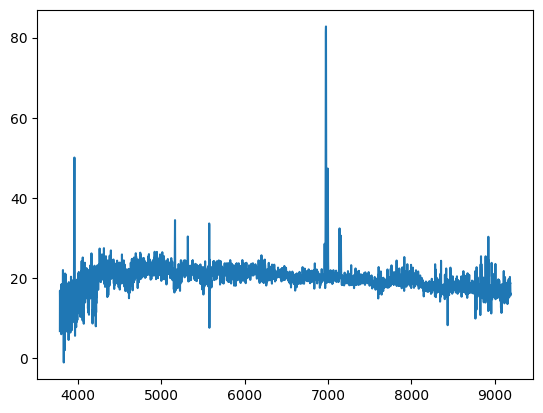

In [72]:
from matplotlib import pyplot as plt

plt.plot(wave,flux)

Re-use

In [8]:
data

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,SPEC2_I,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON
0,sdss,SDSS,chunk4,legacy,chunk4,bad,2.994897e+17,1.237649e+18,1.237649e+18,2.994894e+17,...,7.67533,0.000000,0.000000,0,NaN,NaN,0.000000,0.0,0,0
1,sdss,SDSS,chunk4,legacy,chunk4,bad,2.994900e+17,1.237649e+18,1.237649e+18,2.994894e+17,...,7.67533,0.000000,0.000000,0,NaN,NaN,0.000000,0.0,0,0
2,sdss,SDSS,chunk4,legacy,chunk4,bad,2.994902e+17,1.237649e+18,1.237649e+18,2.994894e+17,...,7.67533,0.000000,0.000000,0,NaN,NaN,0.000000,0.0,0,0
3,sdss,SDSS,chunk4,legacy,chunk4,bad,2.994905e+17,1.237651e+18,1.237651e+18,2.994894e+17,...,7.67533,0.000000,0.000000,0,NaN,NaN,0.000000,0.0,0,0
4,sdss,SDSS,chunk4,legacy,chunk4,bad,2.994908e+17,1.237651e+18,1.237651e+18,2.994894e+17,...,7.67533,0.000000,0.000000,0,NaN,NaN,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801195,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,1.412694e+19,NaN,NaN,1.412667e+19,...,81.52670,0.354088,0.000220,5,GALAXY,NaN,0.000949,0.0,0,0
5801196,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,1.412694e+19,1.237674e+18,1.237674e+18,1.412667e+19,...,81.52670,0.729929,0.000055,0,GALAXY,NaN,0.200185,0.0,0,0
5801197,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,1.412694e+19,1.237654e+18,1.237654e+18,1.412667e+19,...,81.52670,0.071645,0.000170,0,GALAXY,NaN,0.021977,0.0,0,0
5801198,eboss,BOSS,eboss28,eFEDS,2019.12.d.eboss,good,1.412694e+19,1.237674e+18,1.237674e+18,1.412667e+19,...,81.52670,0.344895,0.000018,0,GALAXY,NaN,1.494970,0.0,0,0


In [4]:
class_name_column = "class_name"

data.loc[(data["CLASS"] == "QSO") & ((data["SUBCLASS"].str.contains("STAR", na=True)) | (data["SUBCLASS"] == "BROADLINE")), class_name_column] = "qso"
#
data.loc[((data["CLASS"] == "QSO") | (data["CLASS"] == "GALAXY")) & (data["SUBCLASS"].str.contains("AGN", na=False)), class_name_column] = "agn"
#
data.loc[(data["CLASS"] == "GALAXY") & (data["SUBCLASS"].str.contains("STARBURST", na=False)), class_name_column] = "sbg"
#
data.loc[(data["CLASS"] == "GALAXY") & (data["SUBCLASS"].str.contains("STARFORMING", na=False)), class_name_column] = "sfg"
#
data.loc[(data["CLASS"] == "GALAXY") & ((data["SUBCLASS"].str.contains("NaN",na=True) | (data["SUBCLASS"] == "BROADLINE"))), class_name_column] = "gal"
#
data.loc[data["CLASS"] == "STAR", class_name_column] = "star"

In [5]:
data = data.rename(columns={"PLUG_RA": "RA", "PLUG_DEC": "DEC", "Z": "z", "Z_ERR": "z_err"})

In [6]:
data = data[(data["ZWARNING"].astype(int) == 0) & (0.1 > abs(data["z_err"].astype(float)/data["z"].astype(float))) & (data["z"].astype(float) <= 4.0)]

In [7]:
data['DEC'] = data['DEC'].astype(float)
data['RA'] = data['RA'].astype(float)
data = data.sort_values(by=["DEC"], ascending=True)
data

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,class_name
1609086,segue1,SDSS,chunk169,segue,dr2007.10.2,good,3206597918890944512,1237672793966510236,1237672793966510236,3206563009396762624,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1609083,segue1,SDSS,chunk169,segue,dr2007.10.2,good,3206597094257223680,1237672793966444676,1237672793966444676,3206563009396762624,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1609048,segue1,SDSS,chunk169,segue,dr2007.10.2,good,3206587473530480640,1237672794503446583,1237672794503446583,3206563009396762624,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1609043,segue1,SDSS,chunk169,segue,dr2007.10.2,good,3206586099140945920,1237672794503446534,1237672794503446534,3206563009396762624,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1609205,segue1,SDSS,chunk169,segue,dr2007.10.2,good,3206630629361870848,1237672793429508107,1237672793429508107,3206563009396762624,...,0.0,0.0,0,,,0.0,0.0,0,0,star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451450,segue1,SDSS,chunk146,segue,dr2006.05.2,good,2859942787619514368,1237671073834336346,1237671073834336346,2859785832334649344,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1455880,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868936243683551232,1237671073834336545,1237671073834336545,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1451418,segue1,SDSS,chunk146,segue,dr2006.05.2,good,2859933991526492160,1237671073834139722,1237671073834139722,2859785832334649344,...,0.0,0.0,0,,,0.0,0.0,0,0,star
1455809,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868916727352158208,1237671073834205431,1237671073834205431,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,star


In [9]:
data.to_csv(f"{sdss_general_path}/SDSS_spec_wi.csv", index=False)

In [14]:
del class_name_column

In [13]:
data = pd.read_csv(f"{sdss_general_path}/SDSS_spec_wi.csv", dtype=str, keep_default_na=False)

In [4]:
data["class_name"].unique()

array(['star', 'qso', '', 'sbg', 'sfg', 'gal', 'agn'], dtype=object)

In [ ]:
#?
data[data["class_name"] == ""]

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,class_name
754,segue1,SDSS,chunk162,seguefaint,dr2007.01.2,good,3049073363692578816,1237671141472862553,1237671141472862553,3048937024250734592,...,0.0,0.0,0,,,0.0,0.0,0,0,
765,segue1,SDSS,chunk162,seguefaint,dr2007.01.2,good,3049055771506534400,1237671142009668014,1237671142009668014,3048937024250734592,...,0.0,0.0,0,,,0.0,0.0,0,0,
1502,segue1,SDSS,chunk170,seguefaint,dr2007.10.3,good,3235870768524978176,1237671166707499120,1237671166707499120,3235836408786610176,...,0.0,0.0,0,,,0.0,0.0,0,0,
1844,segue1,SDSS,chunk127,seguefaint,dr2005.10.2,good,2609838260729440256,1237668730920633196,1237668730920633196,2609836061706184704,...,0.0,0.0,0,,,0.0,0.0,0,0,
1932,segue1,SDSS,chunk127,seguefaint,dr2005.10.2,good,2609837436095719424,1237668730920632347,1237668730920632347,2609836061706184704,...,0.0,0.0,0,,,0.0,0.0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253009,segue1,SDSS,chunk146,segue,dr2006.05.2,good,2860921359192582144,1237671072225689706,1237671072225689706,2860911738465839104,...,0.0,0.0,0,,,0.0,0.0,0,0,
4253050,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2869977212541495296,1237671071688229243,1237671071688229243,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,
4253062,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2869990681558935552,1237671071151030300,1237671071151030300,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,
4254095,segue1,SDSS,chunk146,segue,dr2006.05.2,good,2861078589355354112,1237671073835909299,1237671073835909299,2860911738465839104,...,0.0,0.0,0,,,0.0,0.0,0,0,


In [2]:
data_g = pd.read_csv(f"{sdss_general_path}/SDSS_spec_AGN.csv", dtype=str, keep_default_na=False)

In [27]:
data_g = data[data["class_name"] == "agn"].reset_index(drop=True)

In [3]:
data_g

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,class_name
0,sdss,SDSS,chunk20,legacy,dr2001.6.2,marginal,730715398659401728,1237652899137126481,1237652899137126481,730709076467542016,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
1,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,734088699276453888,1237673018909392988,1237673018909392988,734086775131105280,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
2,sdss,SDSS,chunk20,legacy,dr2001.6.2,marginal,736416915282487296,1237652628564672598,1237652628564672598,736338575079008256,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
3,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,738614014426245120,1237652628566900794,1237652628566900794,738590374926247936,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
4,sdss,SDSS,chunk20,legacy,dr2001.6.2,marginal,736393825538304000,1237652628564934771,1237652628564934771,736338575079008256,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36167,sdss,SDSS,chunk93A,legacy,dr2004.06.2,good,2115694368068233216,1237663788501631140,1237663788501631140,2115566000085690368,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
36168,sdss,SDSS,chunk93A,legacy,dr2004.06.2,good,2115705638062417920,1237663917349208492,1237663917349208492,2115566000085690368,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
36169,sdss,SDSS,chunk93A,legacy,dr2004.06.2,good,2115738898289158144,1237663787965415521,1237663787965415521,2115566000085690368,...,0.0,0.0,0,,,0.0,0.0,0,0,agn
36170,sdss,SDSS,chunk93A,legacy,dr2004.06.2,good,2115690519777536000,1237663917886210152,1237663917886210152,2115566000085690368,...,0.0,0.0,0,,,0.0,0.0,0,0,agn


In [10]:
data_g = data[(data['class_name'] == 'sbg') | (data['class_name'] == 'sfg')].reset_index(drop=True)

In [11]:
data_g

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,class_name
0,segue1,SDSS,chunk162,seguefaint,dr2007.01.2,good,3049065941989091328,1237671167779537231,1237671167779537231,3048937024250734592,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
1,segue1,SDSS,chunk127,seguefaint,dr2005.10.2,good,2609862175107344384,1237668730920371071,1237668730920371071,2609836061706184704,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
2,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,732994685257148416,1237652899138502746,1237652899138502746,732960875274594304,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
3,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,734144224613656576,1237673017298518152,1237673017298518152,734086775131105280,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
4,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,734121959503194112,1237672794499317861,1237672794499317861,734086775131105280,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387186,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2869968416448473088,1237671072225165776,1237671072225165776,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
387187,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868848007875422208,1237671566135001321,1237671566135001320,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
387188,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868965380741687296,1237671566672593084,1237671566672593088,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
387189,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2870053353721718784,1237671073298907599,1237671073298907599,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg


In [12]:
data_g.to_csv(f"{sdss_general_path}/SDSS_spec_SFG_SBG.csv", index=False)

<h1> SFG&SBG prime sample </h1>

In [9]:
data_g = pd.read_csv(f"{sdss_general_path}/SDSS_spec_SFG_SBG.csv", 
                     dtype={'SPECOBJID': str, 'FLUXOBJID': str, 'BESTOBJID': str, 'PLATEID': str}, 
                     keep_default_na=False)

In [12]:
data_g

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,SPECOBJID,FLUXOBJID,BESTOBJID,PLATEID,...,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,class_name
0,segue1,SDSS,chunk162,seguefaint,dr2007.01.2,good,3049065941989091328,1237671167779537231,1237671167779537231,3048937024250734592,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
1,segue1,SDSS,chunk127,seguefaint,dr2005.10.2,good,2609862175107344384,1237668730920371071,1237668730920371071,2609836061706184704,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
2,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,732994685257148416,1237652899138502746,1237652899138502746,732960875274594304,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
3,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,734144224613656576,1237673017298518152,1237673017298518152,734086775131105280,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
4,sdss,SDSS,chunk20,legacy,dr2001.6.2,good,734121959503194112,1237672794499317861,1237672794499317861,734086775131105280,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387186,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2869968416448473088,1237671072225165776,1237671072225165776,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
387187,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868848007875422208,1237671566135001321,1237671566135001320,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg
387188,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2868965380741687296,1237671566672593084,1237671566672593088,2868793032294033408,...,0.0,0.0,0,,,0.0,0.0,0,0,sfg
387189,segue1,SDSS,chunk147,seguefaint,dr2006.05.3,good,2870053353721718784,1237671073298907599,1237671073298907599,2869918938425223168,...,0.0,0.0,0,,,0.0,0.0,0,0,sbg


In [13]:
data_g['SURVEY'].unique()

array(['segue1', 'sdss', 'boss', 'segue2', 'eboss'], dtype=object)

In [3]:
data_g_sdss = data_g[data_g['SURVEY'] == 'sdss'].reset_index(drop=True)

In [11]:
%pip install wget


  Using cached wget-3.2-py3-none-any.whl



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2> Spectra download </h2>

In [6]:
import wget
url_sas = lambda r2d,plate,fiberid,mjd: f"https://dr18.sdss.org/sas/dr18/spectro/sdss/redux/{r2d}/spectra/lite/{plate}/spec-{plate}-{mjd}-{fiberid}.fits"

fix_number = lambda x: ('0000' + str(x))[-4:] if len(str(x)) < 5 else str(x)

spec_path = "C:/Users/lrik/Work/spectra_agn"
def dir(save_path,name):
    dir_name = f"{save_path}/{name}"
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)

In [4]:
import logging

# Create and configure logger
logging.basicConfig(level=logging.DEBUG,
                    filename=f"{sdss_general_path}/spectra.log",
                    format='[%(asctime)s] --- %(levelname)s --- %(message)s',
                    filemode='a')
# Creating an object
logger = logging.getLogger()


In [10]:
import time

WAIT_UNTIL_REPEAT_ACCESS = 3
NUM_URL_ACCESS_ATTEMPTS = 3

def dow(i, data):
    dir(spec_path,data.loc[i,'RUN2D'])
    dir(f"{spec_path}/{data.loc[i,'RUN2D']}",fix_number(data.loc[i,'PLATE']))
    
    attempts = 0

    while attempts < NUM_URL_ACCESS_ATTEMPTS:
        try:
            wget.download(url=url_sas(data.loc[i,'RUN2D'],fix_number(data.loc[i,'PLATE']),fix_number(data.loc[i,'FIBERID']),data.loc[i,'MJD']),
                            out=f"{spec_path}/{data.loc[i,'RUN2D']}/{fix_number(data.loc[i,'PLATE'])}/")
            break
        except:
            attempts += 1
            logger.warning(f"Some issue with {i}, attempts number {attempts}")
            time.sleep(WAIT_UNTIL_REPEAT_ACCESS)
    
    if attempts == NUM_URL_ACCESS_ATTEMPTS:
        logger.error(f"{i} don't download")


In [28]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(max_workers=16) as executor:
    for i in range(data_g.shape[0]):
        executor.submit(dow,i,data_g)

<h2> Check files integrity </h2>

In [12]:
%%time

fix_number = lambda x: ('0000' + str(x))[-4:] if len(str(x)) < 5 else str(x)
file_path = lambda i, x: f"{spec_path}/{x.loc[i,'RUN2D']}/{fix_number(x.loc[i,'PLATE'])}/spec-{fix_number(x.loc[i,'PLATE'])}-{x.loc[i,'MJD']}-{fix_number(x.loc[i,'FIBERID'])}.fits"

def check(i,data):
    return os.path.isfile(file_path(i,data))

index_check_mass = []

logger.info("Check files integrity")

for i in range(data_g.shape[0]):
    if not check(i,data_g):
        index_check_mass.append(i)
        logger.info(f"{i} no found")

if index_check_mass == []:
    logger.info("Files integrity status: Excellent")

CPU times: total: 2.89 s
Wall time: 2.89 s


In [8]:
index_check_mass

[2472]

<h2> Create image </h2>

In [30]:
from matplotlib import pyplot as plt

In [16]:
fix_number = lambda x: ('0000' + str(x))[-4:] if len(str(x)) < 5 else str(x)
file_path = lambda i, x: f"{spec_path}/{x.loc[i,'RUN2D']}/{fix_number(x.loc[i,'PLATE'])}/spec-{fix_number(x.loc[i,'PLATE'])}-{x.loc[i,'MJD']}-{fix_number(x.loc[i,'FIBERID'])}.fits"
file_name = lambda i, x: f"spec-{fix_number(x.loc[i,'PLATE'])}-{x.loc[i,'MJD']}-{fix_number(x.loc[i,'FIBERID'])}"

def spec_img(i,data):    
    name = file_name(i,data)
    spec = fits.open(file_path(i,data))
    wave=10**spec['COADD'].data['loglam']
    flux = spec['COADD'].data['flux']

    fig = plt.figure(num=1, clear=True)
    ax = fig.add_subplot(1,1,1)
    ax.plot(wave,flux,c='black', linewidth=0.5)
    fig.set_size_inches(20,10)
    fig.savefig(f"{spec_path}_img/{name}.png", bbox_inches='tight')
    spec.close()
    #plt.close()
    #del fig, spec
    
    

KeyboardInterrupt: 

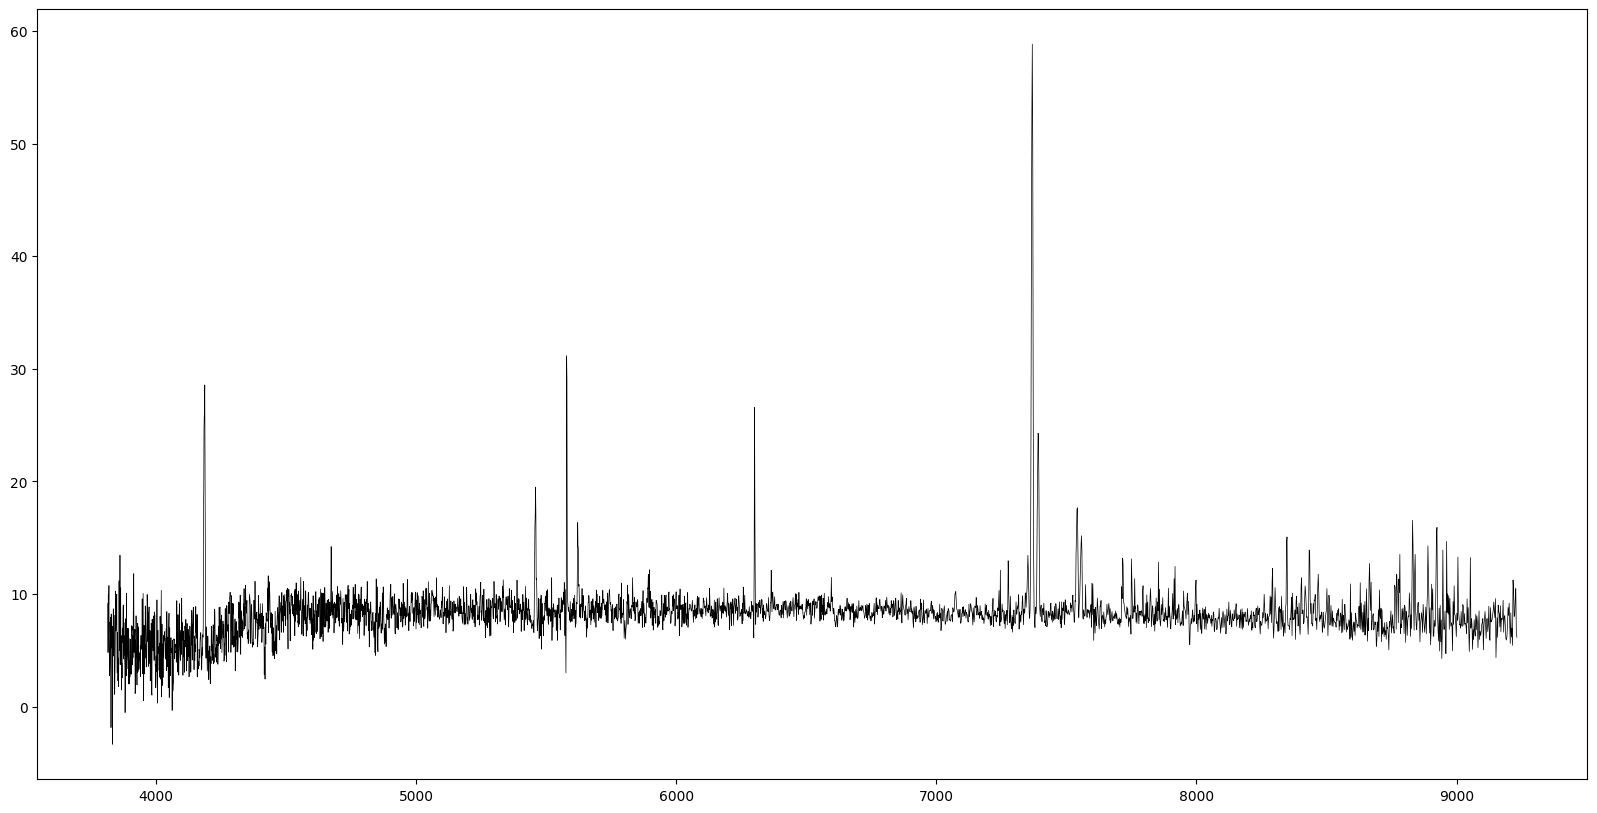

In [9]:
for i in range(20000):
    spec_img(i,data_g)

<h3> 3D Image </h3>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


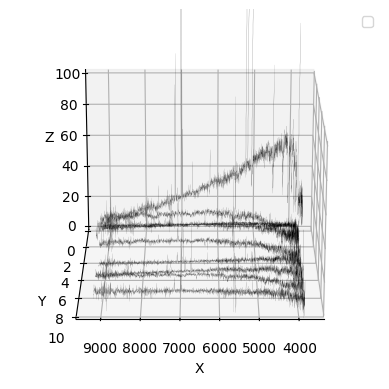

In [37]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
#x = np.linspace(0, 1, 100)
#y = np.sin(x * 2 * np.pi) / 2 + 0.5
#ax.plot(x, y, zs=0, zdir='z')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

for i in range(10):
    name = file_name(i,data_g)
    spec = fits.open(file_path(i,data_g))
    wave=10**spec['COADD'].data['loglam']
    flux = spec['COADD'].data['flux']
    # By using zdir='y', the y value of these points is fixed to the zs value 0
    # and the (x, y) points are plotted on the x and z axes.
    ax.plot(wave, flux, zs=i, zdir='y', c="black", linewidth=0.05)

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(3500, 9500)
ax.set_ylim(0, 10)
ax.set_zlim(0, 100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=90, roll=0)

plt.show()

In [32]:
name = file_name(10,data_g)
spec = fits.open(file_path(10,data_g))
wave=10**spec['COADD'].data['loglam']
flux = spec['COADD'].data['flux']

In [ ]:
spec['COADD'].data['and_mask']

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3842 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

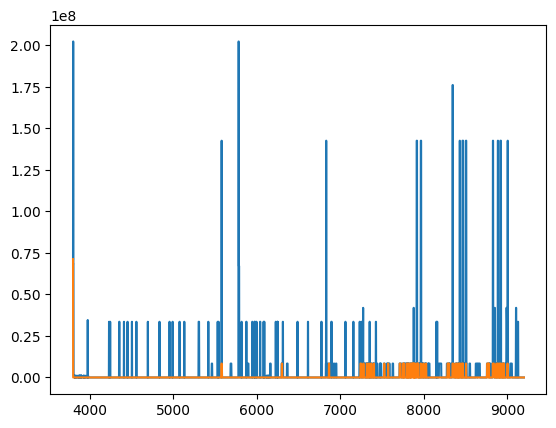

In [42]:
plt.plot(wave,spec['COADD'].data['or_mask'])
plt.plot(wave,spec['COADD'].data['and_mask'])


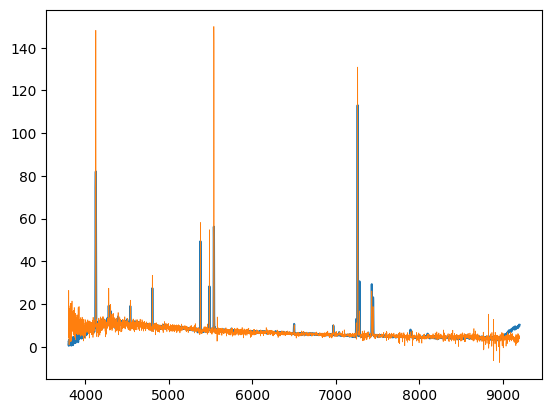

In [48]:
#plt.plot(wave,spec['COADD'].data['sky'])
plt.plot(wave,spec['COADD'].data['model'])
plt.plot(wave,spec['COADD'].data['flux'], linewidth=0.5)



In [50]:
np.max(spec['COADD'].data['model'])

113.06358

In [29]:
name = file_name(11,data_g)
spec = fits.open(file_path(11,data_g))
wave=10**spec['COADD'].data['loglam']
flux = spec['COADD'].data['flux']

In [31]:
wave

array([3803.6448, 3804.522 , 3805.3972, ..., 9206.613 , 9208.736 ,
       9210.8545], dtype=float32)

In [16]:
flux[0]

8.75894

<h2> Data unification </h2>

In [28]:
mi = np.trunc(np.min(wave))
ma = np.ceil(np.max(wave))
n = int(ma - mi)
array = np.zeros(n)
for i, w in enumerate(wave):
    array[int(np.trunc(w) - mi)] += flux[i]

In [151]:
n_wave = np.linspace(mi,ma-1,n)

In [17]:
def median(array, window_size):
    win = lambda array,s,f: np.sort(array[s:f])[window_size]

    result = array.copy()

    for i in range(window_size,array.shape[0]-window_size,1):
        if(array[i] == 0):
            result[i] = win(array,i - window_size,i + window_size)
    
    return result

In [140]:
%%timeit
# or 1
median(array,2)

2.86 ms ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(5530.0, 5550.0)

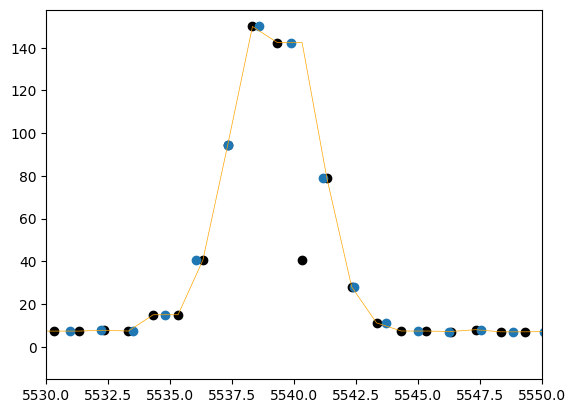

In [121]:
#plt.plot(n_wave,array,linewidth=0.5)
plt.scatter(n_wave,median(array,5), c="black")
#plt.scatter(n_wave,median(array,2), c = "y")
plt.plot(n_wave,median(array,1),linewidth=0.5, c = "orange")
plt.scatter(wave,spec['COADD'].data['flux'])
plt.xlim(5530,5550)
#plt.ylim(0,10)

In [145]:
data_g["class_name"].unique()

array(['sbg', 'sfg'], dtype=object)

In [149]:
sbg_sample = data_g[data_g["class_name"] == "sbg"].sample(1000,ignore_index=True)
sfg_sample = data_g[data_g["class_name"] == "sfg"].sample(1000,ignore_index=True)

In [152]:
n_wave

array([3799., 3800., 3801., ..., 9198., 9199., 9200.])

In [18]:
def unif(index, data):
    n = 5402
    mi = 3799
    ma = 9201

    #name = file_name(index,data)
    spec = fits.open(file_path(index,data))
    wave=10**spec['COADD'].data['loglam']
    flux = spec['COADD'].data['flux']
    
    array = np.zeros(n)
    
    for i, w in enumerate(wave):
        if(w < ma and w > mi):
            array[int(np.trunc(w) - mi)] += flux[i]

    return median(array,2)

def ssample(data,class_name,count):
    sample = data[data["class_name"] == class_name].sample(count,ignore_index=True)
    spec = np.zeros((count,5402))
    for i in range(count):
        spec[i] = unif(i,sample)
    return spec

def ssample_(data,class_name):
    sample = data[data["class_name"] == class_name].reset_index(drop=True)
    spec = np.zeros((sample.shape[0],5402))
    for i in range(sample.shape[0]):
        spec[i] = unif(i,sample)
    return spec

In [19]:
agn_sample_a = ssample_(data_g,"agn")

In [20]:
import joblib

joblib.dump(agn_sample_a,f'{sdss_general_path}/spec_agn_dump.gz')

['C:/Users/lrik/Work/spec_agn_dump.gz']

In [13]:
sbg_sample = ssample(data_g,"sbg",20000)

KeyboardInterrupt: 

In [17]:
sbg_sample_a = ssample_(data_g,"sbg")

In [199]:
sfg_sample = ssample(data_g,"sfg",20000)

In [10]:
sfg_sample_a = ssample_(data_g,"sfg")
joblib.dump(sfg_sample_a,f'{sdss_general_path}/spec_sfg_dump.gz')

['C:/Users/lrik/Work/spec_sfg_dump.gz']

In [209]:
sfg_1_sample = ssample(data_g,"sfg",5000)
sbg_1_sample = ssample(data_g,"sbg",5000)

In [210]:
test_X = np.zeros((10000,5402))
test_X[0:5000,:] = sfg_1_sample
test_X[5000:10000,:] = sbg_1_sample

In [11]:
import sys

sys.getsizeof(sfg_sample_a)

12437824224

In [3]:
import joblib

sbg_sample_a = joblib.load(f'{sdss_general_path}/spec_sbg_dump.gz')
agn_sample_a = joblib.load(f'{sdss_general_path}/spec_agn_dump.gz')

<h3> Shrink data </h3>

In [2]:
def shrink(count,data):
    n = data.shape[1] // count
    array = np.zeros((data.shape[0],count+1))
    for i in range(data.shape[1]):
        array[:,i // n] += data[:,i]
    return array[:,0:count]

In [17]:
from matplotlib import pyplot as plt

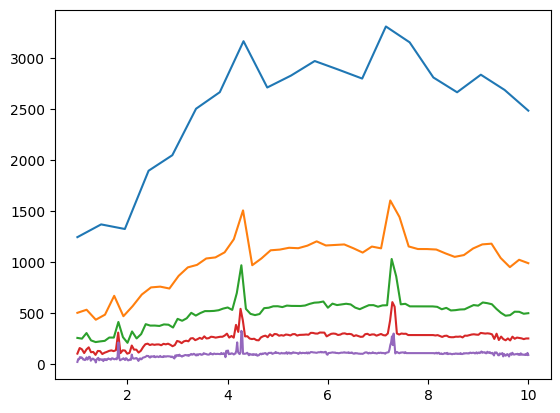

In [68]:
plt.plot(np.linspace(1,10,20),shrink(20,agn_sample_a)[10,:])
plt.plot(np.linspace(1,10,50),shrink(50,agn_sample_a)[10,:])
plt.plot(np.linspace(1,10,100),shrink(100,agn_sample_a)[10,:])
plt.plot(np.linspace(1,10,200),shrink(200,agn_sample_a)[10,:])
plt.plot(np.linspace(1,10,540),shrink(540,agn_sample_a)[10,:])


In [200]:
sys.getsizeof(sfg_sample)

864320128

<h4> Select 4500 - 8500 A </h4>

In [3]:
train_X = np.zeros((sbg_sample_a.shape[0]+agn_sample_a.shape[0],4000))
train_X[0:sbg_sample_a.shape[0],:] = sbg_sample_a[:,700:4700]
train_X[sbg_sample_a.shape[0]:sbg_sample_a.shape[0]+agn_sample_a.shape[0],:] = agn_sample_a[:,700:4700]

train_Y = np.zeros((sbg_sample_a.shape[0]+agn_sample_a.shape[0],))
train_Y[0:sbg_sample_a.shape[0]] = 1

In [201]:
train_X = np.zeros((40000,5402))
train_X[0:20000,:] = sfg_sample
train_X[20000:40000,:] = sbg_sample

<h4> Select all </h4>

In [4]:
train_X = np.zeros((sbg_sample_a.shape[0]+agn_sample_a.shape[0],agn_sample_a.shape[1]))
train_X[0:sbg_sample_a.shape[0],:] = sbg_sample_a
train_X[sbg_sample_a.shape[0]:sbg_sample_a.shape[0]+agn_sample_a.shape[0],:] = agn_sample_a

train_Y = np.zeros((sbg_sample_a.shape[0]+agn_sample_a.shape[0],))
train_Y[0:sbg_sample_a.shape[0]] = 1

In [34]:
sfg_sample_a = joblib.load(f'{sdss_general_path}/spec_sfg_dump.gz')

In [35]:
sfg_sample_sh = shrink(50,sfg_sample_a)

In [36]:
del sfg_sample_a

In [5]:
train_X_shrink = shrink(50,train_X)

In [42]:
train_X = np.zeros((train_X_shrink.shape[0]+sfg_sample_sh.shape[0],train_X_shrink.shape[1]))
train_X[0:train_X_shrink.shape[0],:] = train_X_shrink
train_X[train_X_shrink.shape[0]:,:] = sfg_sample_sh

train_yy = np.zeros((train_X_shrink.shape[0]+sfg_sample_sh.shape[0],))
train_yy[0:train_X_shrink.shape[0]] = train_Y
train_yy[train_X_shrink.shape[0]:] = 2


In [6]:
del train_X

In [7]:
del agn_sample_a, sbg_sample_a

In [202]:
train_Y = np.zeros((40000,))
train_Y[0:20000] = 1

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,
                                 criterion='gini',
                                 bootstrap=True,
                                 random_state=476,
                                 n_jobs=-1)

clf.fit(X=train_X, y=train_yy)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=476)

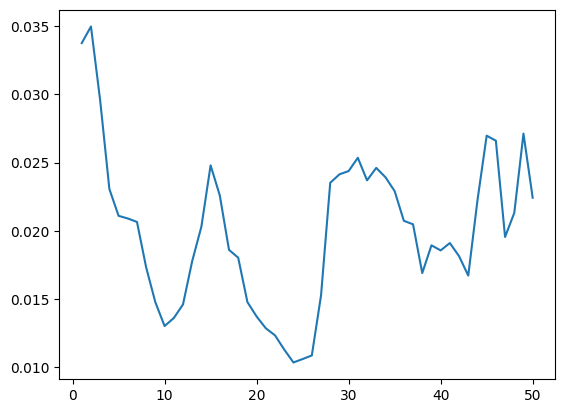

In [48]:
plt.plot(np.linspace(1,50,50),clf.feature_importances_)

AGN & SBG

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,
                                 criterion='gini',
                                 bootstrap=True,
                                 random_state=476,
                                 n_jobs=-1)

clf.fit(X=train_X_shrink, y=train_Y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=476)

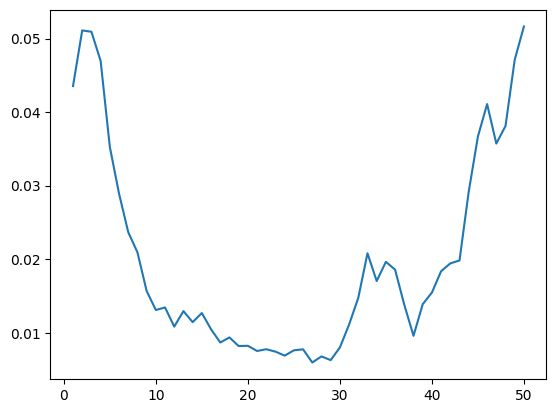

In [ ]:
plt.plot(np.linspace(1,50,50),clf.feature_importances_)

In [50]:
eval(clf.predict(train_X),train_yy)

99385 0 36172 0


,Accuracy,Purity,Completness,F1,FPR,TNR,bACC,K,MCC,BinaryBS
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [8]:
train_X_shrink_p = pd.DataFrame(train_X_shrink)

In [9]:
train_X_shrink_p['y'] = train_Y

In [10]:
train_X_1k = train_X_shrink_p.sample(1000,ignore_index=True)

In [11]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [52]:
params = {'C': loguniform(1e0, 1e3),
          'gamma': loguniform(1e-4, 1e-2)}

clf = svm.SVC(gamma='scale',
                #kernel='rbf',
                kernel='linear',
                probability=True,
                class_weight='balanced',
                cache_size=10000,
                random_state=476)
'''
clf_gs = RandomizedSearchCV(estimator=clf, param_distributions=params, 
                            n_iter=1, scoring='f1', n_jobs=-1, 
                            cv=ShuffleSplit(n_splits=1, test_size=0.2),   
                            refit=True, verbose=1)
'''

"\nclf_gs = RandomizedSearchCV(estimator=clf, param_distributions=params, \n                            n_iter=1, scoring='f1', n_jobs=-1, \n                            cv=ShuffleSplit(n_splits=1, test_size=0.2),   \n                            refit=True, verbose=1)\n"

In [54]:
a = StandardScaler().fit(train_X)

In [14]:
a.transform(train_X_1k.iloc[:,0:50])

array([[ 2.10408533e+00,  1.23810160e+00,  1.24534496e+00, ...,
         3.37885839e-01,  3.55073795e-01,  3.75391118e-01],
       [-1.07110726e-01, -1.82861943e-01, -2.15737528e-01, ...,
        -2.62964231e-01, -2.71031500e-01, -2.98613604e-01],
       [-6.08264866e-01, -6.34469124e-01, -6.37824410e-01, ...,
        -4.84318741e-01, -4.35524183e-01, -4.42325326e-01],
       ...,
       [-2.19681569e-01, -3.00732617e-01, -1.34999991e-01, ...,
        -1.63055502e-01, -1.64767901e-01, -1.97362571e-01],
       [-5.56360062e-01, -5.84917058e-01, -5.88631571e-01, ...,
        -5.40579352e-01, -5.52347121e-01, -5.47616698e-01],
       [ 1.17439092e-02,  7.21014937e-03, -4.77830779e-02, ...,
        -5.43120776e-02, -5.36126771e-03, -1.45651431e-03]])

In [22]:
clf.fit(a.transform(train_X_shrink),train_Y)

SVC(cache_size=15000, class_weight='balanced', kernel='linear',
    probability=True, random_state=476)

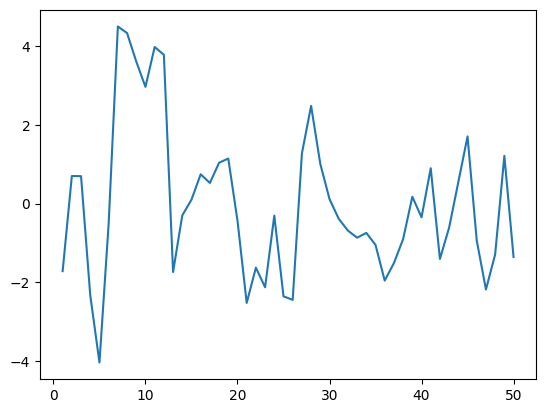

In [23]:
plt.plot(np.linspace(1,50,50),clf.coef_[0])

In [24]:
res = clf.predict(train_X_shrink)

In [29]:
joblib.dump(clf,f'{sdss_general_path}/classification/sbg_1_agn_0_features_50.svc')

['C:/Users/lrik/Work/classification/sbg_1_agn_0_features_50.svc']

In [25]:
pd.DataFrame(res)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
135552,0.0
135553,0.0
135554,0.0
135555,0.0


In [28]:
eval(res,train_Y)

77478 1380 34792 21907


,Accuracy,Purity,Completness,F1,FPR,TNR,bACC,K,MCC,BinaryBS
0,0.828212,0.9825,0.779574,0.869353,0.024339,0.613626,0.798063,0.628074,0.664817,0.171788


In [ ]:
clf.fit(a.transform(train_X),train_yy)

In [27]:
import math 

thr = lambda x: 1 if x >= 0.5 else 0

def eval(y_prediction,y_actual):
    count = 0
    TP, FP, TN, FN = 0,0,0,0
    #Y = 0
    Y = y_prediction#.apply(thr)
    TP = Y[(1 == y_actual) & (Y == 1)].shape[0]
    FP = Y[(0 == y_actual) & (Y == 1)].shape[0]
    TN = Y[(0 == y_actual) & (Y == 0)].shape[0]
    FN = Y[(1 == y_actual) & (Y == 0)].shape[0]
    print(TP,FP,TN,FN)
    '''
    for i in range(y_prediction.shape[0]):
        Y = thr(y_prediction[i],0.5)
        if(Y==y_actual[i]):
            count+=1
        if(Y==1):
            if(Y==y_actual[i]):
                TP += 1
            else:
                FP += 1
        if(Y==0):
            if(Y==y_actual[i]):
                TN += 1
            else:
                FN += 1
    '''
    try:
        Acc = Y[Y == y_actual].shape[0]/Y.shape[0]
    except:
        print("Acc division by zero")
        Acc = 999.0
    try:        
        pur_a = TP/(TP+FP)
    except:
        print("pur_a division by zero")
        pur_a = 999.0
    try:
        com_a = TP/(TP+FN)
    except:
        print("com_a division by zero")
        com_a = 999.0
    try:
        f1 = 2*TP/(2*TP+FP+FN)
    except:
        print("f1 division by zero")
        f1 = 999.0
    try:
        fpr = FP/(TN+FN)
    except:
        print("fpr division by zero")
        fpr = 999.0
    try:
        tnr = TN/(TN+FN)
    except:
        print("tnr division by zero")
        tnr = 999.0
    try:
        bAcc = (TP/(TP+FP)+TN/(TN+FN))/2.
    except:
        print("bAcc division by zero")
        bAcc = 999.0
    try:
        k = 2*(TP*TN-FN*FP)/((TP+FP)*(FP+TN)+(TP+FN)*(FN+TN))
    except:
        print("k division by zero")
        k = 999.0
    try:
        mcc = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    except:
        print("mcc division by zero")
        mcc = 999.0
    try:
        BinBs = (FP+FN)/(TP+FP+FN+TN)
    except:
        print("BinBs division by zero")
        BinBs = 999.0

    #print(np.array([Acc,pur_a,com_a,f1,fpr,tnr,bAcc,k,mcc,BinBs]))
    ev = pd.DataFrame([np.array([Acc,pur_a,com_a,f1,fpr,tnr,bAcc,k,mcc,BinBs])], 
    columns=['Accuracy','Purity','Completness','F1',
    'FPR','TNR','bACC','K','MCC','BinaryBS'])

    return ev

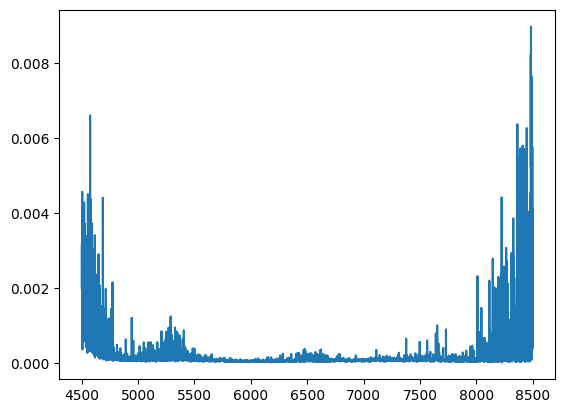

In [45]:
plt.plot(np.linspace(4500,8500,4000),clf.feature_importances_)

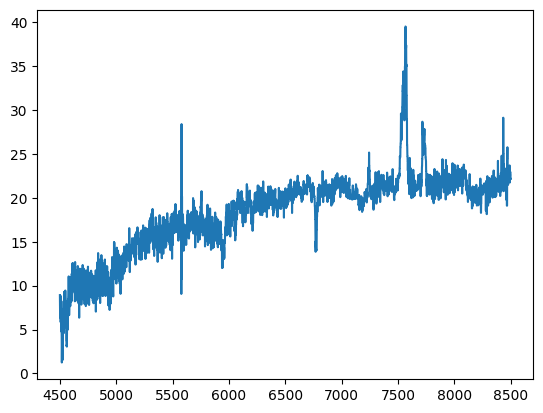

In [48]:
plt.plot(np.linspace(4500,8500,4000),train_X[100000,:])

ValueError: x and y must have same first dimension, but have shapes (5402,) and (4000,)

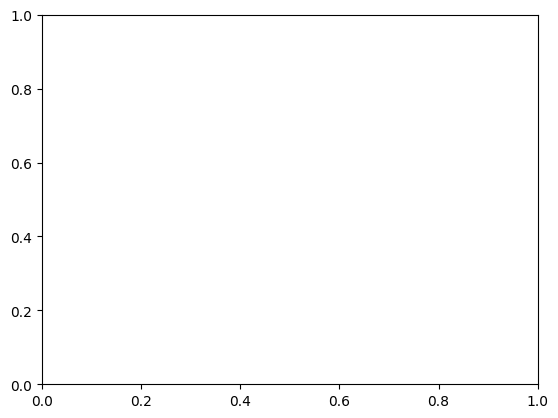

In [44]:
plt.plot(np.linspace(3799,9200,5402),clf.feature_importances_)

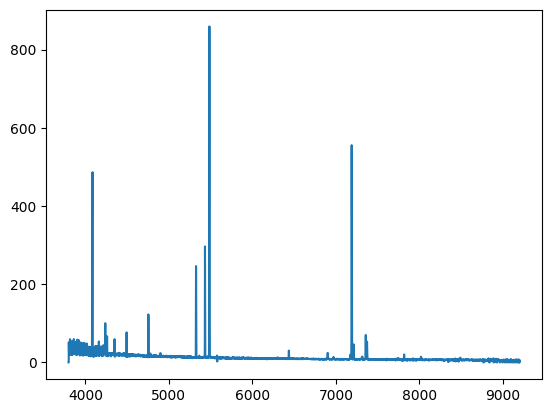

In [38]:
plt.plot(np.linspace(3799,9200,5402),sbg_sample_a[1000,:])

In [212]:
np.sum(res)

4852.0

<h2> Search in log file </h2>

In [27]:
import re

index_mass_2 = []

for line in open(f"{spec_path}/log_2.log",'r'):
    try:
        index_mass_2.append(int(re.search("ERROR --- (.+?) don't download", line).group(1)))
    except AttributeError:
        continue

In [35]:
data_g['DEC']

0        -15.849282
1        -12.291423
2        -11.244275
3        -11.238405
4        -11.236264
            ...    
387186    83.048305
387187    83.197519
387188    83.800934
387189    83.852377
387190    84.270371
Name: DEC, Length: 387191, dtype: float64

In [28]:
n_d_2 = data_g.loc[index_mass_2]

In [ ]:
n_d_2["DEC"]

16684     -0.666708
17591     -0.703368
17793     -0.710874
18068     -0.722349
18843     -0.752741
            ...    
335110    54.319460
335497    54.410668
335908    54.500675
337220    54.796889
337546    54.855151
Name: DEC, Length: 5623, dtype: float64

In [29]:
n_d_2[n_d_2['SURVEY'] == 'sdss']['SPECOBJID'].values.astype(str)

array([], dtype='<U1')

In [35]:
n_d_2['PLATE']

19914     12533
28866     12525
25295     12545
28964     12525
26214     12525
          ...  
335110    10654
335497    10654
335908    10654
337220    10654
337546    10654
Name: PLATE, Length: 5622, dtype: object

In [21]:
del data

In [10]:
dow(0)

In [26]:
un_spec = (data_g_sdss['RUN2D'].astype(str) + "-" + data_g_sdss['PLATE'].astype(str) + "-" + data_g_sdss['FIBERID'].astype(str) + "-" + data_g_sdss['MJD'].astype(str)).unique()

In [28]:
un_spec

array(['26-651-123-52141', '26-652-209-52138', '26-652-128-52138', ...,
       '26-1879-526-54478', '26-1879-525-54478', '26-1879-443-54478'],
      dtype=object)

In [27]:
un_spec.shape

(322074,)

In [33]:
banch_0 = data_g_sdss[data_g_sdss['RUN2D'] + "-" + data_g_sdss['PLATE'].astype(str) + "-" + data_g_sdss['MJD'].astype(str) == un_spec[0]]

In [ ]:
banch_0["RA"].min(),banch_0["RA"].max(),banch_0["DEC"].min(),banch_0["DEC"].max()

(0.79676233, 3.6352782, -11.244275, -8.7340995)

In [48]:
banch_0.loc[0]

SURVEY                                  sdss  
INSTRUMENT                                SDSS
CHUNK                         chunk20         
PROGRAMNAME        legacy                     
PLATERUN                      dr2001.6.2      
PLATEQUALITY                          good    
PLATEID                   732960875274594304.0
NSPECOBS                                     1
FIRSTRELEASE                              dr7 
RUN2D                                       26
SOURCETYPE           GALAXY                   
TARGETTYPE                            SCIENCE 
SPECTROGRAPHID                               1
PLATE                                      651
TILE                                       453
MJD                                      52141
RA                                    2.272162
DEC                                 -11.244275
CLASS                                   GALAXY
SUBCLASS                 STARFORMING          
z                                     0.108176
z_err        

In [29]:
data_g_sdss["RA"].unique().shape

(295724,)

In [15]:

data['RUN2D'].unique()

array(['26', '104', 'v5_13_2', '103', '104    '], dtype=object)

In [39]:
p = "C:/Users/lrik/Downloads"
plates = fits.open(f"{p}/plates-SDSS-dr18.fits")
plates.info()

Filename: C:/Users/lrik/Downloads/plates-SDSS-dr18.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1                1 BinTableHDU    279   2880R x 131C   [19A, 3A, 3A, A, 3A, J, J, J, J, J, 53A, D, D, 37A, 10A, 11A, 10A, 8A, D, D, D, J, D, D, D, E, J, 13A, 28A, E, E, E, E, E, 15A, 16A, 16A, 6A, 16A, 4A, 23A, 16A, 4A, 121A, 8A, 77A, E, E, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 4A, 4A, 4A, J, J, J, J, J, J, J, J, J, E, J, E, 6A, 6A, 7A, J]   


In [ ]:
import pandas as pd

data = pd.read_csv(r"C:\Users\lrik\Downloads\Telegram Desktop\Items Stats (3) (2).txt")
data.to_excel(r"C:\Users\lrik\Downloads\Telegram Desktop\Items Stats (3) (2).xlsx", index=False)

: 